# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang terdiri dari data harga dan volume harian historis lengkap untuk semua saham dan ETF berbasis AS yang diperdagangkan di NYSE, NASDAQ, dan NYSE MKT.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

import os
import pandas_datareader as web
import shutil
import kagglehub
from pathlib import Path
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
files.upload()

{}

In [3]:
# 1️⃣ Make the kaggle folder (if it doesn’t exist)
!mkdir -p ~/.kaggle

# 2️⃣ Copy your kaggle.json file from the current directory into that folder
!cp kaggle.json ~/.kaggle/

# 3️⃣ Set proper file permissions
!chmod 600 ~/.kaggle/kaggle.json

# 4️⃣ Download your dataset from Kaggle
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs
# 5️⃣ Unzip the downloaded file
!unzip price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
User cancelled operation
Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
path_data = '/content/Data'

apple_files = None

for root, dirs, files in os.walk(path_data):
  for f in files:
    if f.lower() == 'aapl.us.txt':
      apple_files = os.path.join(root,f)
      break
  if apple_files:
    break

In [5]:
# Load the CSV if found
if apple_files:
    print(f"apple file found: {apple_files}")
    df = pd.read_csv(apple_files)
    print(df.head(20))
else:
    print("apple CSV file not found in the dataset!")

apple file found: /content/Data/Stocks/aapl.us.txt
          Date     Open     High      Low    Close    Volume  OpenInt
0   1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
1   1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
2   1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
3   1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
4   1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0
5   1984-09-14  0.44052  0.45589  0.44052  0.44566  68847968        0
6   1984-09-17  0.45718  0.46357  0.45718  0.45718  53755262        0
7   1984-09-18  0.45718  0.46103  0.44052  0.44052  27136886        0
8   1984-09-19  0.44052  0.44566  0.43157  0.43157  29641922        0
9   1984-09-20  0.43286  0.43668  0.43286  0.43286  18453585        0
10  1984-09-21  0.43286  0.44566  0.42388  0.42902  27842780        0
11  1984-09-24  0.42902  0.43157  0.42516  0.42516  22033109        0
12  1984-09-25  0.42388  0.42388  0.416

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
#Type your code here

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8364 non-null   object 
 1   Open     8364 non-null   float64
 2   High     8364 non-null   float64
 3   Low      8364 non-null   float64
 4   Close    8364 non-null   float64
 5   Volume   8364 non-null   int64  
 6   OpenInt  8364 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 457.5+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
OpenInt,0


In [15]:
df.drop_duplicates()

,Date,Open,High,Low,Close,Volume,OpenInt,day_sin,day_cos,month_sin,month_cos
0,1984-09-07,0.001091,0.001103,0.001082,0.001103,0.011219,0,0.988468,0.151428,-1.0,-1.836970e-16
1,1984-09-10,0.001091,0.001081,0.001052,0.001088,0.008708,0,0.897805,-0.440394,-1.0,-1.836970e-16
2,1984-09-11,0.001099,0.001146,0.001118,0.001132,0.020533,0,0.790776,-0.612106,-1.0,-1.836970e-16
3,1984-09-12,0.001121,0.001117,0.001067,0.001059,0.017937,0,0.651372,-0.758758,-1.0,-1.836970e-16
4,1984-09-13,0.001179,0.001168,0.001199,0.001190,0.027936,0,0.485302,-0.874347,-1.0,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...
8359,2017-11-06,0.980786,0.992872,0.981786,0.988710,0.016862,0,0.937752,0.347305,-0.5,8.660254e-01
8360,2017-11-07,0.989593,0.993728,0.994369,0.991846,0.011801,0,0.988468,0.151428,-0.5,8.660254e-01
8361,2017-11-08,0.993824,1.000000,0.996782,1.000000,0.011813,0,0.998717,-0.050649,-0.5,8.660254e-01
8362,2017-11-09,0.996397,0.999145,0.989945,0.997947,0.014269,0,0.968077,-0.250653,-0.5,8.660254e-01


In [16]:
df.dropna()

,Date,Open,High,Low,Close,Volume,OpenInt,day_sin,day_cos,month_sin,month_cos
0,1984-09-07,0.001091,0.001103,0.001082,0.001103,0.011219,0,0.988468,0.151428,-1.0,-1.836970e-16
1,1984-09-10,0.001091,0.001081,0.001052,0.001088,0.008708,0,0.897805,-0.440394,-1.0,-1.836970e-16
2,1984-09-11,0.001099,0.001146,0.001118,0.001132,0.020533,0,0.790776,-0.612106,-1.0,-1.836970e-16
3,1984-09-12,0.001121,0.001117,0.001067,0.001059,0.017937,0,0.651372,-0.758758,-1.0,-1.836970e-16
4,1984-09-13,0.001179,0.001168,0.001199,0.001190,0.027936,0,0.485302,-0.874347,-1.0,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...
8359,2017-11-06,0.980786,0.992872,0.981786,0.988710,0.016862,0,0.937752,0.347305,-0.5,8.660254e-01
8360,2017-11-07,0.989593,0.993728,0.994369,0.991846,0.011801,0,0.988468,0.151428,-0.5,8.660254e-01
8361,2017-11-08,0.993824,1.000000,0.996782,1.000000,0.011813,0,0.998717,-0.050649,-0.5,8.660254e-01
8362,2017-11-09,0.996397,0.999145,0.989945,0.997947,0.014269,0,0.968077,-0.250653,-0.5,8.660254e-01


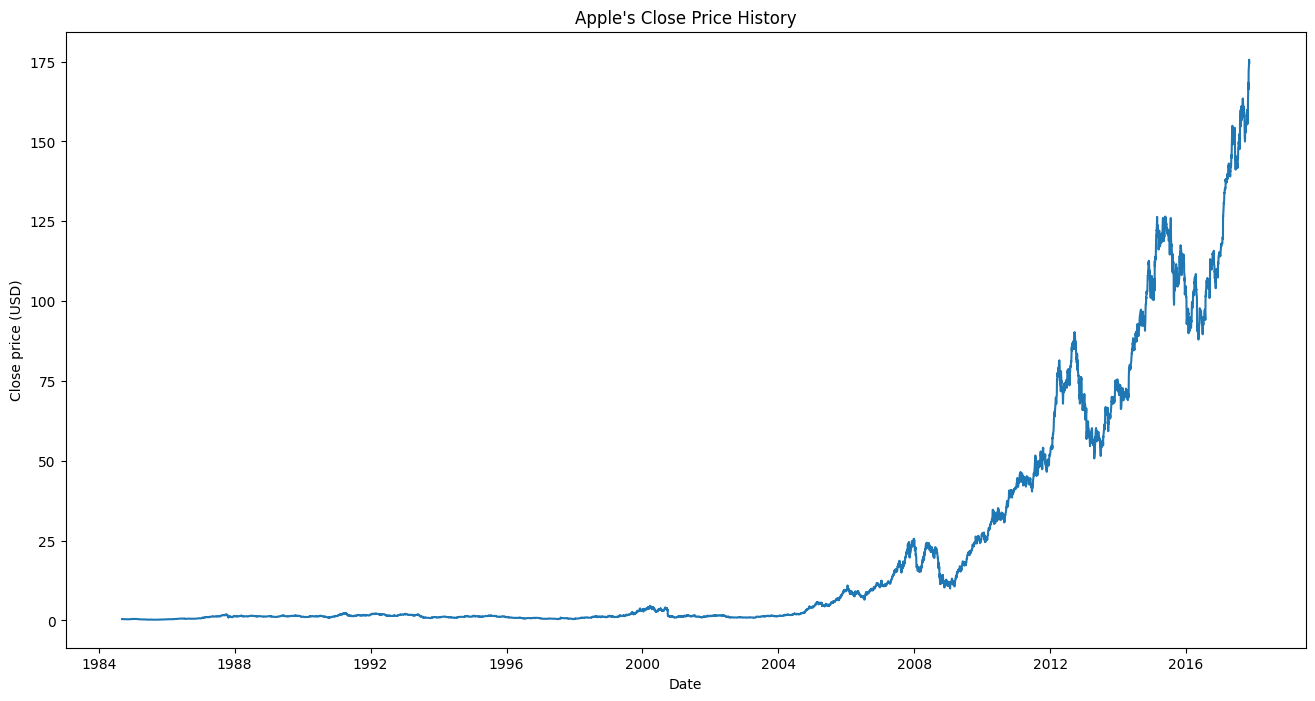

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(16,8))
plt.title("Apple's Close Price History")
plt.plot(df["Date"], df["Close"])
plt.xlabel('Date')
plt.ylabel('Close price (USD)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
#Encoding
df_copy = df.copy()



df["day_sin"] = np.sin(2 * np.pi * df["Date"].dt.day / 31)
df["day_cos"] = np.cos(2 * np.pi * df["Date"].dt.day / 31)

df["month_sin"] = np.sin(2 * np.pi * df["Date"].dt.month / 12)
df["month_cos"] = np.cos(2 * np.pi * df["Date"].dt.month / 12)



In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,day_sin,day_cos,month_sin,month_cos
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,0.988468,0.151428,-1.0,-1.836970e-16
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,0.897805,-0.440394,-1.0,-1.836970e-16
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,0.790776,-0.612106,-1.0,-1.836970e-16
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,0.651372,-0.758758,-1.0,-1.836970e-16
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,0.485302,-0.874347,-1.0,-1.836970e-16


In [14]:
#Normalisasi
scaler = MinMaxScaler(feature_range=(0, 1))

df[["Open", "High", "Low", "Close", "Volume"]] = scaler.fit_transform(df[["Open", "High", "Low", "Close", "Volume"]])

df.head()


,Date,Open,High,Low,Close,Volume,OpenInt,day_sin,day_cos,month_sin,month_cos
0,1984-09-07,0.001091,0.001103,0.001082,0.001103,0.011219,0,0.988468,0.151428,-1.0,-1.836970e-16
1,1984-09-10,0.001091,0.001081,0.001052,0.001088,0.008708,0,0.897805,-0.440394,-1.0,-1.836970e-16
2,1984-09-11,0.001099,0.001146,0.001118,0.001132,0.020533,0,0.790776,-0.612106,-1.0,-1.836970e-16
3,1984-09-12,0.001121,0.001117,0.001067,0.001059,0.017937,0,0.651372,-0.758758,-1.0,-1.836970e-16
4,1984-09-13,0.001179,0.001168,0.001199,0.001190,0.027936,0,0.485302,-0.874347,-1.0,-1.836970e-16


In [18]:
from google.colab import files

df.to_csv("aapl.us.txt_preprocessing.csv", index=False)
files.download("aapl.us.txt_preprocessing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>